In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
# 加载图像，并将其转换为灰度图像
class fit_draw_ellipse(object):
    def __init__(self, edge_img):
        self.edge_img = edge_img
        self.file_name = edge_img.split('\\')[-1].split('.')[0]
        self.img = cv2.imread(edge_img)

    def fit_ellipse_acquire_parameter(self):
        image = cv2.imread(self.edge_img)
        print(image.shape)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # 对图像进行二值化处理
        _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        
        # 查找轮廓
        contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print(contours.__len__())
        print(hierarchy)
        diameter = []
        for contour in contours:
            if contour.__len__() >= 5:
                ellipsis = cv2.fitEllipse(contour)
                min_diameter = ellipsis[1][0] * 0.125 # 0.125
                max_diameter = ellipsis[1][1] * 0.125
                diameter.append(min_diameter)
                diameter.append(max_diameter)
        area = np.pi * (diameter[0]/2) * (diameter[1]/2)
        approx_perimeter = np.pi * (3 * (diameter[0] + diameter[1]) - np.sqrt(
                    (3 * diameter[0] + diameter[1]) * (diameter[0] + 3 * diameter[1])))
        exact_parameter = {'area': area, 'approx_perimeter': approx_perimeter,'diameter':diameter}
        return exact_parameter, ellipsis
    
    def draw_ellipse(self):
        parm = self.fit_ellipse_acquire_parameter()[1]
        img = self.edge_padding()
        img = cv2.ellipse(img, parm, (24,25,199), 2)
        plt.imshow(img)
        return img
        
    def __call__(self, save_path):
        # 保存图片
        img = self.draw_ellipse()
        if os.path.exists(save_path) is False:
            os.makedirs(save_path)
        fname  = 'fit' + '_' + self.file_name + '.jpg'
        img_path = os.path.join(save_path, fname)
        cv2.imwrite(img_path, img)
        
    def save_ell_para(self, save_path):
        # 保存椭圆的面积、周长、长、短径
        parm = self.fit_ellipse_acquire_parameter()[0]
        df = pd.DataFrame(parm)
        if os.path.exists(save_path) is False:
            os.makedirs(save_path)
        if df.shape[0] == 2:
            fname  = 'fit' + '_' + self.file_name + '.csv'
            csv_path = os.path.join(save_path, fname)
            df.to_csv(csv_path)
        
    def edge_padding(self, top=2, bottom=2, left=2, right=2, borderType=cv2.BORDER_CONSTANT, value=0):
        image = self.img
        height, width = image.shape[:2]
        padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, borderType, value=value)
        padded_h, padded_w = padded_image.shape[:2]
        
        print(f"Original image size: {width} x {height}") 
        print(f"Padded image size: {padded_w} x {padded_h}")
        
        return padded_image

Original image size: 180 x 171
Padded image size: 190 x 181


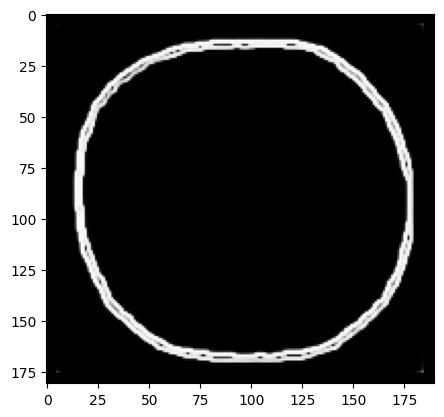